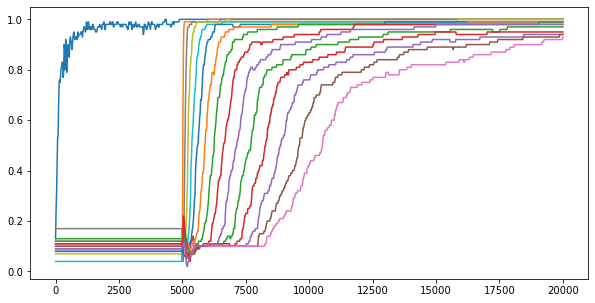

In [3]:
import math

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./accuracy.csv")
df.head()

columns_to_filter = df.columns.drop('tick')  # Exclude "tick" from the condition check
filtered_columns = df[columns_to_filter].columns[df.iloc[-1][columns_to_filter] > 0.9]
filtered_columns_with_tick = filtered_columns.insert(0, 'tick')  # Add "tick" back to the list of filtered columns
df = df[filtered_columns_with_tick]

fig, ax = plt.subplots(1, figsize=(10,5))
for col in filtered_columns:
    ax.plot(df['tick'], df[col], label=col)


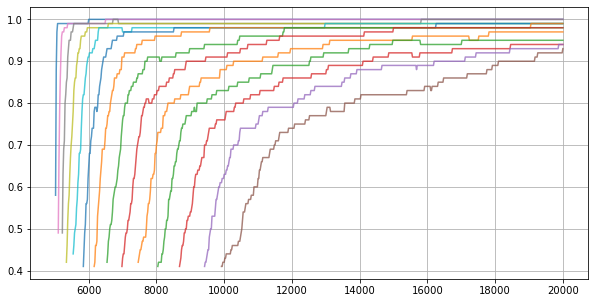

In [4]:
def draw(series_dict_x, series_dict_y):
    fig, ax = plt.subplots(1, figsize=(10,5))
    for key, value in series_dict_x.items():
        ax.plot(series_dict_x[key], series_dict_y[key], label=key, alpha=0.75)
    ax.grid()

# diff method
def calculate_delay(arg_accuracy_series: pd.Series):
    accuracy_diff = arg_accuracy_series.diff()
    accuracy_diff.dropna(inplace=True)
    largest_diff = accuracy_diff.nlargest(10)
    largest_indexes = largest_diff.index
    for i in largest_indexes:
        return i
    
# threshold method
def find_first_value_larger_than(series: pd.Series):
    for index,value in series.items():
        if value > 0.4:
            return index
    return None

columns_to_apply = df.columns.drop(['tick', '0'])  # Exclude "tick"
delay = df[columns_to_apply].apply(find_first_value_larger_than)

x_s = {}
y_s = {}
for column in columns_to_apply:
    x_s[column] = df['tick'][delay[column]:]
    y_s[column] = df[column][delay[column]:]

draw(x_s, y_s)

### shift x-axis

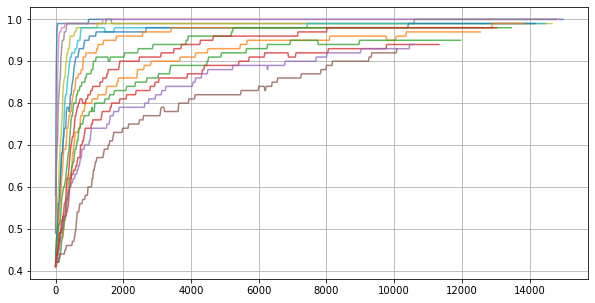

In [5]:
for index, x_series in x_s.items():
    first_value = x_series.iloc[0]
    x_s[index] = x_series - first_value

draw(x_s, y_s)

,1,10,11,12,13,14,2,3,4,5,6,7,8,9
0,0.58,0.42,0.41,0.41,0.41,0.41,0.49,0.49,0.42,0.44,0.41,0.41,0.42,0.41
1,0.88,0.43,0.42,0.42,0.42,0.41,0.66,0.63,0.46,0.46,0.45,0.42,0.44,0.43
2,0.97,0.44,0.42,0.43,0.42,0.42,0.78,0.69,0.52,0.49,0.49,0.46,0.47,0.44
3,0.99,0.45,0.42,0.45,0.43,0.42,0.86,0.71,0.56,0.50,0.51,0.46,0.48,0.44
4,0.99,0.45,0.42,0.46,0.44,0.42,0.92,0.80,0.58,0.51,0.56,0.47,0.50,0.46


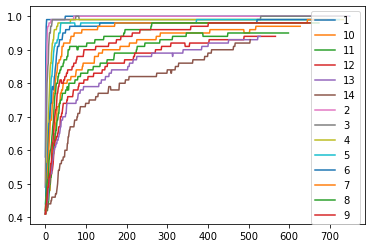

In [6]:
for index, y_series in y_s.items():
    y_series.reset_index(inplace=True, drop=True)

all_data = {**y_s}
df_for_analysis = pd.DataFrame(all_data)
df_for_analysis.plot()
df_for_analysis.head()

<AxesSubplot:>

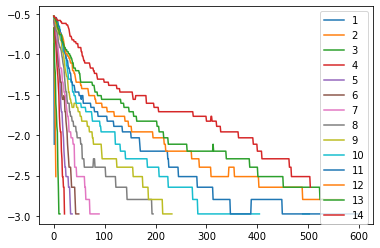

In [14]:
import math
import numpy as np
def func(x):
    return math.log(1.001-x)
    # return 1.001-x


df_for_analysis2 = df_for_analysis.applymap(func)
sorted_columns = sorted(df_for_analysis2.columns, key=lambda x: int(x))
df_for_analysis2 = df_for_analysis2[sorted_columns]
df_for_analysis3 = df_for_analysis2.where(df_for_analysis2 >= -3, np.nan)
df_for_analysis3.plot()
# df_for_analysis3.plot(logy=True)
# df_for_analysis3.plot(logx=True)
# df_for_analysis3.plot(logy=True, logx=True)

### calculate slopes

In [8]:
import numpy as np

def calculate_slope(series):
    # Filter the series
    filtered_series = series[series > -3]

    # Use the index as x values if it's meaningful, else consider creating a range or a different x
    x = filtered_series.index
    y = filtered_series.values

    # Calculate the slope using numpy.polyfit
    # polyfit returns coefficients [slope, intercept] for degree 1
    slope, intercept = np.polyfit(x, y, 1)

    return slope

slopes = df_for_analysis2.apply(calculate_slope)
print(slopes)

1    -1.246842
2    -0.456696
3    -0.203558
4    -0.115035
5    -0.074323
6    -0.053117
7    -0.028288
8    -0.009532
9    -0.008689
10   -0.004596
11   -0.003262
12   -0.003184
13   -0.003325
14   -0.003371
dtype: float64
